<a href="https://colab.research.google.com/github/liamlio/tensorflow_sideprojects/blob/master/Fashion_MNIST_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
from tensorflow import keras


TensorFlow 2.x selected.


In [0]:
import numpy as np

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [31]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [0]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [0]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", 
               "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [34]:
class_names[y_train[0]]

'Coat'

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [37]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [38]:
weights, biases = hidden1.get_weights()
print(weights)
print(weights.shape)
print(biases)
print(biases.shape)

[[-0.00696388  0.02315556  0.01644812 ...  0.05099411  0.00374597
   0.06776866]
 [ 0.00949864  0.06629367  0.0253502  ... -0.04261892  0.04556058
   0.07117513]
 [-0.06713334 -0.03340114  0.0567863  ... -0.06018927 -0.01294826
  -0.06413735]
 ...
 [ 0.03799891  0.05640382  0.04379423 ...  0.07083368 -0.05626309
   0.06385313]
 [ 0.0160822   0.05992477  0.02465601 ...  0.04045176  0.03658253
  -0.0014798 ]
 [ 0.03617541 -0.00669625 -0.05002965 ...  0.00730945  0.07011658
   0.06351851]]
(784, 300)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [45]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/32
55000/55000 [==============================] - 8s 142us/sample - loss: 0.7131 - accuracy: 0.7633 - val_loss: 0.5073 - val_accuracy: 0.8278
Epoch 2/32
55000/55000 [==============================] - 7s 128us/sample - loss: 0.4881 - accuracy: 0.8285 - val_loss: 0.4385 - val_accuracy: 0.8530
Epoch 3/32
55000/55000 [==============================] - 7s 126us/sample - loss: 0.4418 - accuracy: 0.8450 - val_loss: 0.4138 - val_accuracy: 0.8582
Epoch 4/32
55000/55000 [==============================] - 7s 127us/sample - loss: 0.4138 - accuracy: 0.8545 - val_loss: 0.3920 - val_accuracy: 0.8644
Epoch 5/32
55000/55000 [==============================] - 7s 128us/sample - loss: 0.3944 - accuracy: 0.8622 - val_loss: 0.3944 - val_accuracy: 0.8636
Epoch 6/32
55000/55000 [==============================] - 7s 127us/sample - loss: 0.3783 - accuracy: 0.8668 - val_loss: 0.3758 - val_accuracy: 0.8690
Epoch 7/32
55000/55000 [===========================

<function matplotlib.pyplot.show>

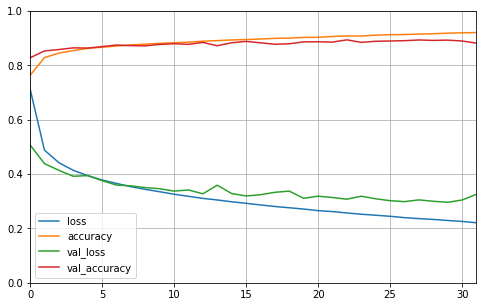

In [49]:
import pandas as pd 
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # Vertical range tto [0-1]
plt.show

In [50]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[71.1000085510254, 0.8344]

In [51]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [52]:
y_pred = model.predict_classes(X_new)
print(y_pred)
np.array(class_names)[y_pred]

[9 2 1]


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')